In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('haberman.csv', header=0)
df.columns = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']
df.head()

,patient_age,operation_year,positive_axillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [53]:
df.shape

(305, 4)

In [54]:
df['survival_status'].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

- Tập dữ liệu không cân đối như mong đợi.
- Trong tổng số 305 bệnh nhân, số bệnh nhân sống sót trên 5 năm sau mổ gấp gần 3 lần số bệnh nhân tử vong trong vòng 5 năm.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   patient_age              305 non-null    int64
 1   operation_year           305 non-null    int64
 2   positive_axillary_nodes  305 non-null    int64
 3   survival_status          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


- Tất cả các cột là kiểu số nguyên.
- Không có giá trị nào bị thiếu trong tập dữ liệu.

In [56]:
df['survival_status'] = df['survival_status'].map({1:'yes', 2:'no'})

In [57]:
df.describe()

,patient_age,operation_year,positive_axillary_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


- Trung bình, bệnh nhân được phẫu thuật ở tuổi 63.
- Số lượng positive_axillary_nodes trung bình được phát hiện = 4.
- Ở phân vị thứ 50, trung vị của các positive_axillary_nodes là 1.
- Ở phân vị thứ 75, 75% bệnh nhân có ít hơn 4 nút được phát hiện.

==> Ta thấy, có sự khác biệt đáng kể giữa giá trị trung bình và giá trị trung vị. Điều này là do có một số outliers trong dữ liệu và giá trị trung bình bị ảnh hưởng bởi các outliers.

In [58]:
survival_yes = df[df.survival_status == 'yes']
survival_yes.describe()

,patient_age,operation_year,positive_axillary_nodes
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [59]:
survival_no = df[df.survival_status == 'no']
survival_no.describe()

,patient_age,operation_year,positive_axillary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


Từ phân tích ở trên, có thể nhận thấy rằng:

- Tuổi trung bình mà bệnh nhân được phẫu thuật gần như là tương đương nhau trong cả hai trường hợp.
- Những bệnh nhân tử vong thì trung bình có khoảng 4 đến 5 positive_axillary_nodes nhiều hơn những bệnh nhân sống trên 5 năm sau phẫu thuật.


<Figure size 1080x576 with 0 Axes>

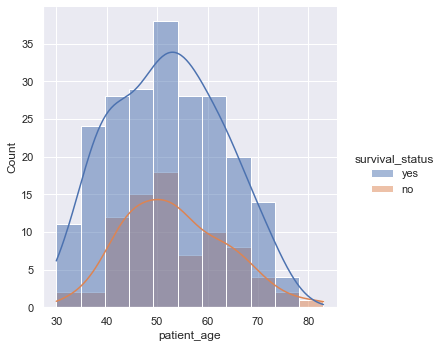

In [60]:
plt.figure(figsize=(15,8))

sns.displot(x='patient_age', data=df, hue='survival_status', kde=True)
plt.show()

- Trong tất cả các nhóm tuổi, bệnh nhân từ 40-60 tuổi là có nhiều nhất.
- Có sự chồng chéo cao giữa các lớp nhãn. Điều này cho thấy rằng tình trạng sống sót của bệnh nhân sau phẫu thuật không thể xác định được từ độ tuổi của bệnh nhân.

<Figure size 1080x576 with 0 Axes>

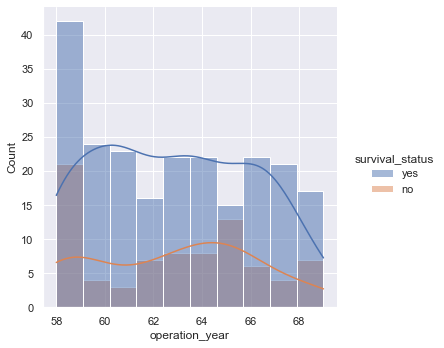

In [61]:
plt.figure(figsize=(15,8))

sns.displot(x='operation_year', data=df, hue='survival_status', kde=True)
plt.show()

- Ta thấy cũng có sự trùng lặp rất lớn giữa các lớp nhãn cho thấy rằng người ta không thể đưa ra bất kỳ kết luận phân biệt nào về tình trạng sống sót chỉ dựa vào năm khảo sát

<Figure size 1440x576 with 0 Axes>

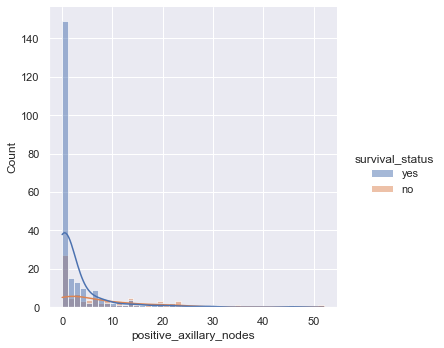

In [62]:
plt.figure(figsize=(20,8))

sns.displot(x='positive_axillary_nodes', data=df, hue='survival_status', kde=True)
plt.show()

- Bệnh nhân có 4 axillary nodes trở xuống, phần lớn những bệnh nhân này sống sót sau 5 năm hoặc lâu hơn.
- Bệnh nhân có nhiều hơn 4 axillary nodes, khả năng sống sót sẽ thấp hơn so với những bệnh nhân có 4 axillary nodes hoặc ít hơn.

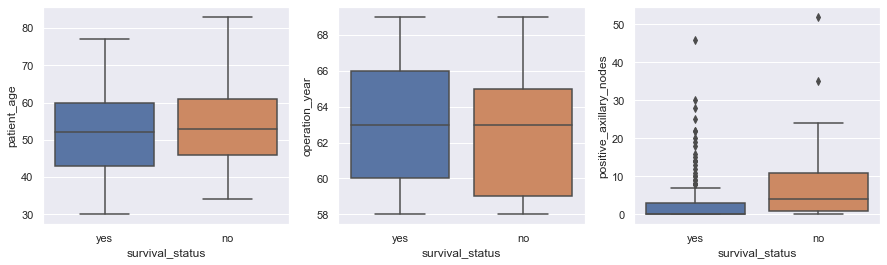

In [63]:
fig, ax = plt.subplots(1,3, figsize=(15,4))

sns.boxplot(x='survival_status', y='patient_age', data = df, ax=ax[0])
sns.boxplot(x='survival_status', y='operation_year', data = df, ax=ax[1])
sns.boxplot(x='survival_status', y='positive_axillary_nodes', data = df, ax=ax[2])

plt.show()

- Tuổi của bệnh nhân và năm khảo sát cho thấy các thống kê tương tự.
- Các điểm được nhìn thấy trong biểu đồ của positive_axillary_nodes là những outliers trong dữ liệu. Một số lượng outliers cao như vậy là điều dễ hiểu trong bộ dữ liệu về y tế.

<Figure size 1080x576 with 0 Axes>

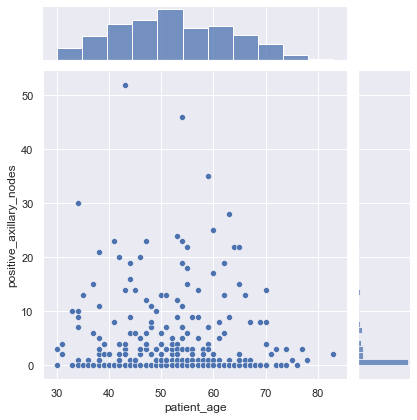

In [64]:
plt.figure(figsize=(15,8))

sns.jointplot(x = 'patient_age', y = 'positive_axillary_nodes', data = df)
plt.show()

- Ta có thể thấy rằng không có mối tương quan giữa patient_age và số lượng các positive_axillary_nodes được phát hiện.
- Biểu đồ ở cạnh trên cho thấy bệnh nhân có nhiều khả năng được phẫu thuật trong độ tuổi 40–60 so với các nhóm tuổi khác.
- Biểu đồ bên phải cho thấy đa số bệnh nhân có ít hơn 4 positive_axillary_nodes.

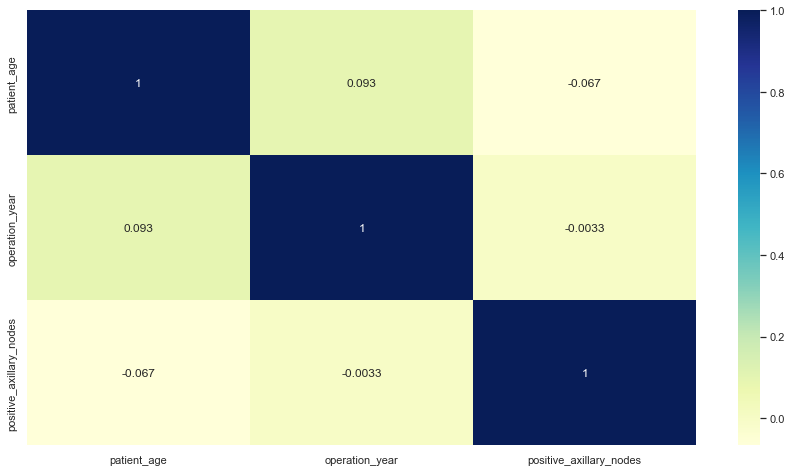

In [65]:
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

Nhìn vào biểu đồ heatmap ta có thể thấy các biến không hề có mối tương quan với nhau

<Figure size 1080x576 with 0 Axes>

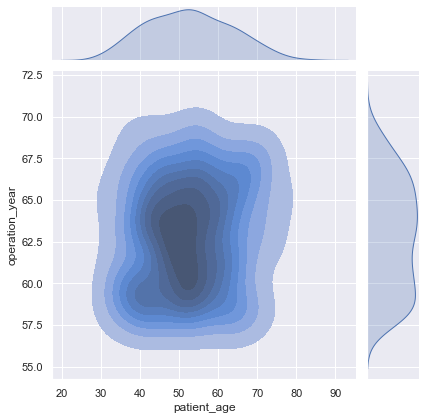

In [66]:
plt.figure(figsize=(15,8))

sns.jointplot(x = 'patient_age',  y = 'operation_year' , data = df,  kind = 'kde', fill = True)
plt.show()

Từ biểu đồ ở trên, có thể thấy rằng những năm 1959–1964 có nhiều bệnh nhân trong độ tuổi 45–55 hơn những năm khác